In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics.cluster import adjusted_rand_score

import gower


In [2]:
# Load the dataset
file_path = 'Unsupervised_Learning_23-24_Project_Dataset.csv'
df = pd.read_csv(file_path, delimiter=';', decimal=',')

# Drop the last two columns
df = df.iloc[:, :-2]

# Identify binary and continuous columns
binary_cols = df.columns[(df.nunique() == 2)]
continuous_cols = df.columns.difference(binary_cols).drop('Row')

# Convert binary columns to integer type
df[binary_cols] = df[binary_cols].astype(int)

# Convert continuous columns to float type
df[continuous_cols] = df[continuous_cols].astype(float)

# Drop the 'Row' column as it's just an index
df = df.drop(columns=['Row'])

# Check for missing values and handle them if necessary
na_count = df.isnull().sum().sum()
if na_count > 0:
    print(f'Total number of missing values: {na_count}')
    df = df.fillna(df.median())  # Fill missing values with the median of each column
    print('Missing values have been filled with the median of each column.')
else:
    print('No missing values found.')

df.head()

No missing values found.


Dim_0  Dim_1=0  Dim_2=0  Dim_3=0  Dim_4=0  Dim_5=0  Dim_6=0  Dim_7=0  \
0  0.750000        1        0        1        1        1        1        1   
1  0.239583        1        1        1        1        1        1        1   
2  0.479167        1        1        1        1        1        1        1   
3  0.656250        0        1        1        1        1        1        1   
4  0.229167        1        1        1        1        1        1        1   

   Dim_8=0  Dim_9=0  ...  Dim_11=0  Dim_12=0  Dim_13=0  Dim_14=0  Dim_15=0  \
0        0        1  ...         1         1         1         1         1   
1        1        1  ...         1         1         1         1         1   
2        1        1  ...         1         1         1         1         1   
3        1        1  ...         1         1         1         1         1   
4        1        1  ...         1         1         1         1         1   

     Dim_16    Dim_17    Dim_18    Dim_19    Dim_20  
0  0.001132  0.080780  0.197324  0.300926  0.225000  
1  0.000472  0.164345  0.235786  0.537037  0.165625  
2  0.003585  0.130919  0.167224  0.527778  0.118750  
3  0.001698  0.091922  0.125418  0.337963  0.129688  
4  0.000472  0.142061  0.229097  0.337963  0.235938  

[5 rows x 21 columns]

             Dim_0      Dim_1=0      Dim_2=0      Dim_3=0      Dim_4=0  \
count  7200.000000  7200.000000  7200.000000  7200.000000  7200.000000   
mean      0.531790     0.695694     0.869444     0.984583     0.987222   
std       0.197156     0.460145     0.336937     0.123212     0.112322   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.375000     0.000000     1.000000     1.000000     1.000000   
50%       0.562500     1.000000     1.000000     1.000000     1.000000   
75%       0.687500     1.000000     1.000000     1.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

           Dim_5=0      Dim_6=0      Dim_7=0      Dim_8=0      Dim_9=0  ...  \
count  7200.000000  7200.000000  7200.000000  7200.000000  7200.000000  ...   
mean      0.961667     0.989167     0.985972     0.983194     0.934444  ...   
std       0.192013     0.103525     0.117613     0.128551     0.247521  ...   
min       0.00000

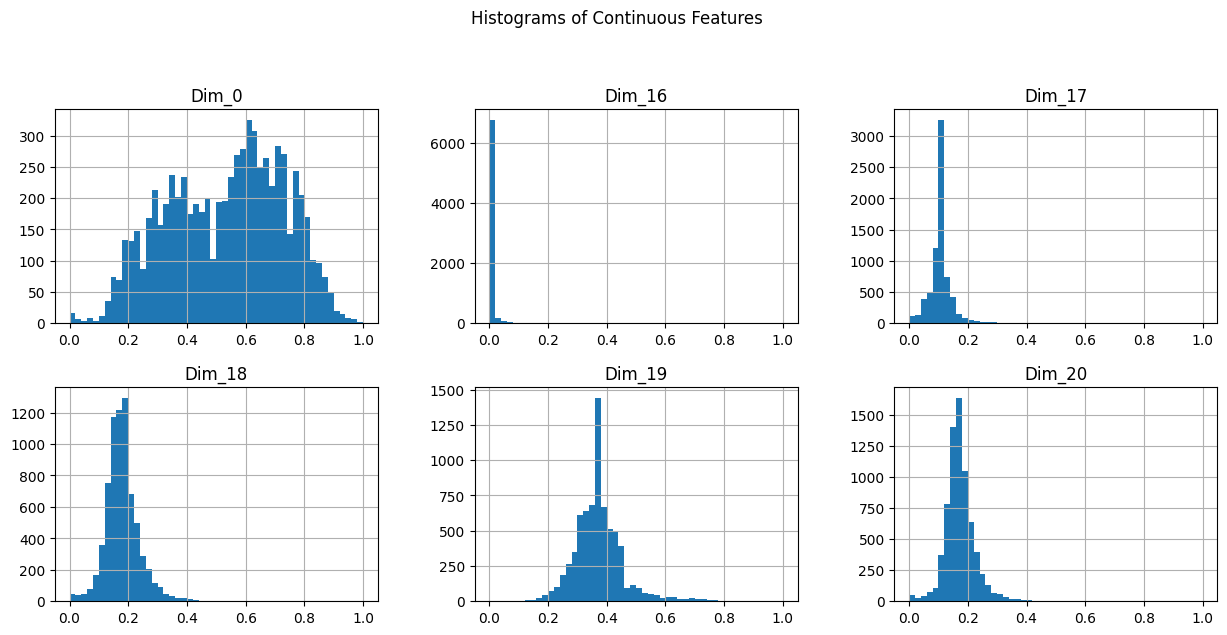

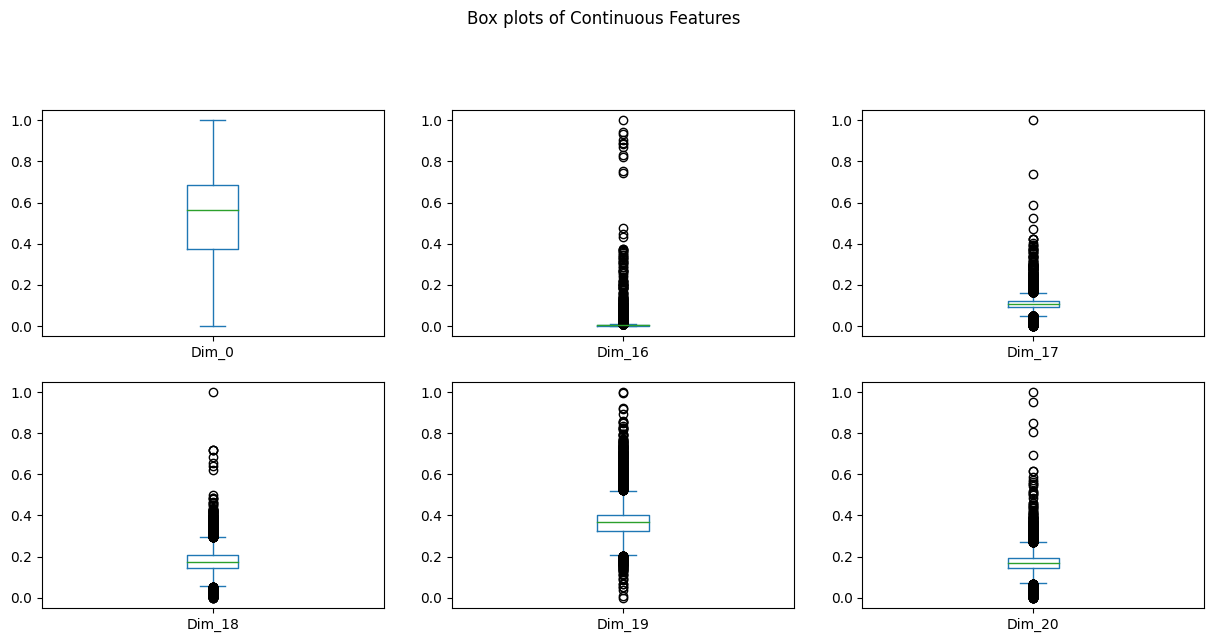

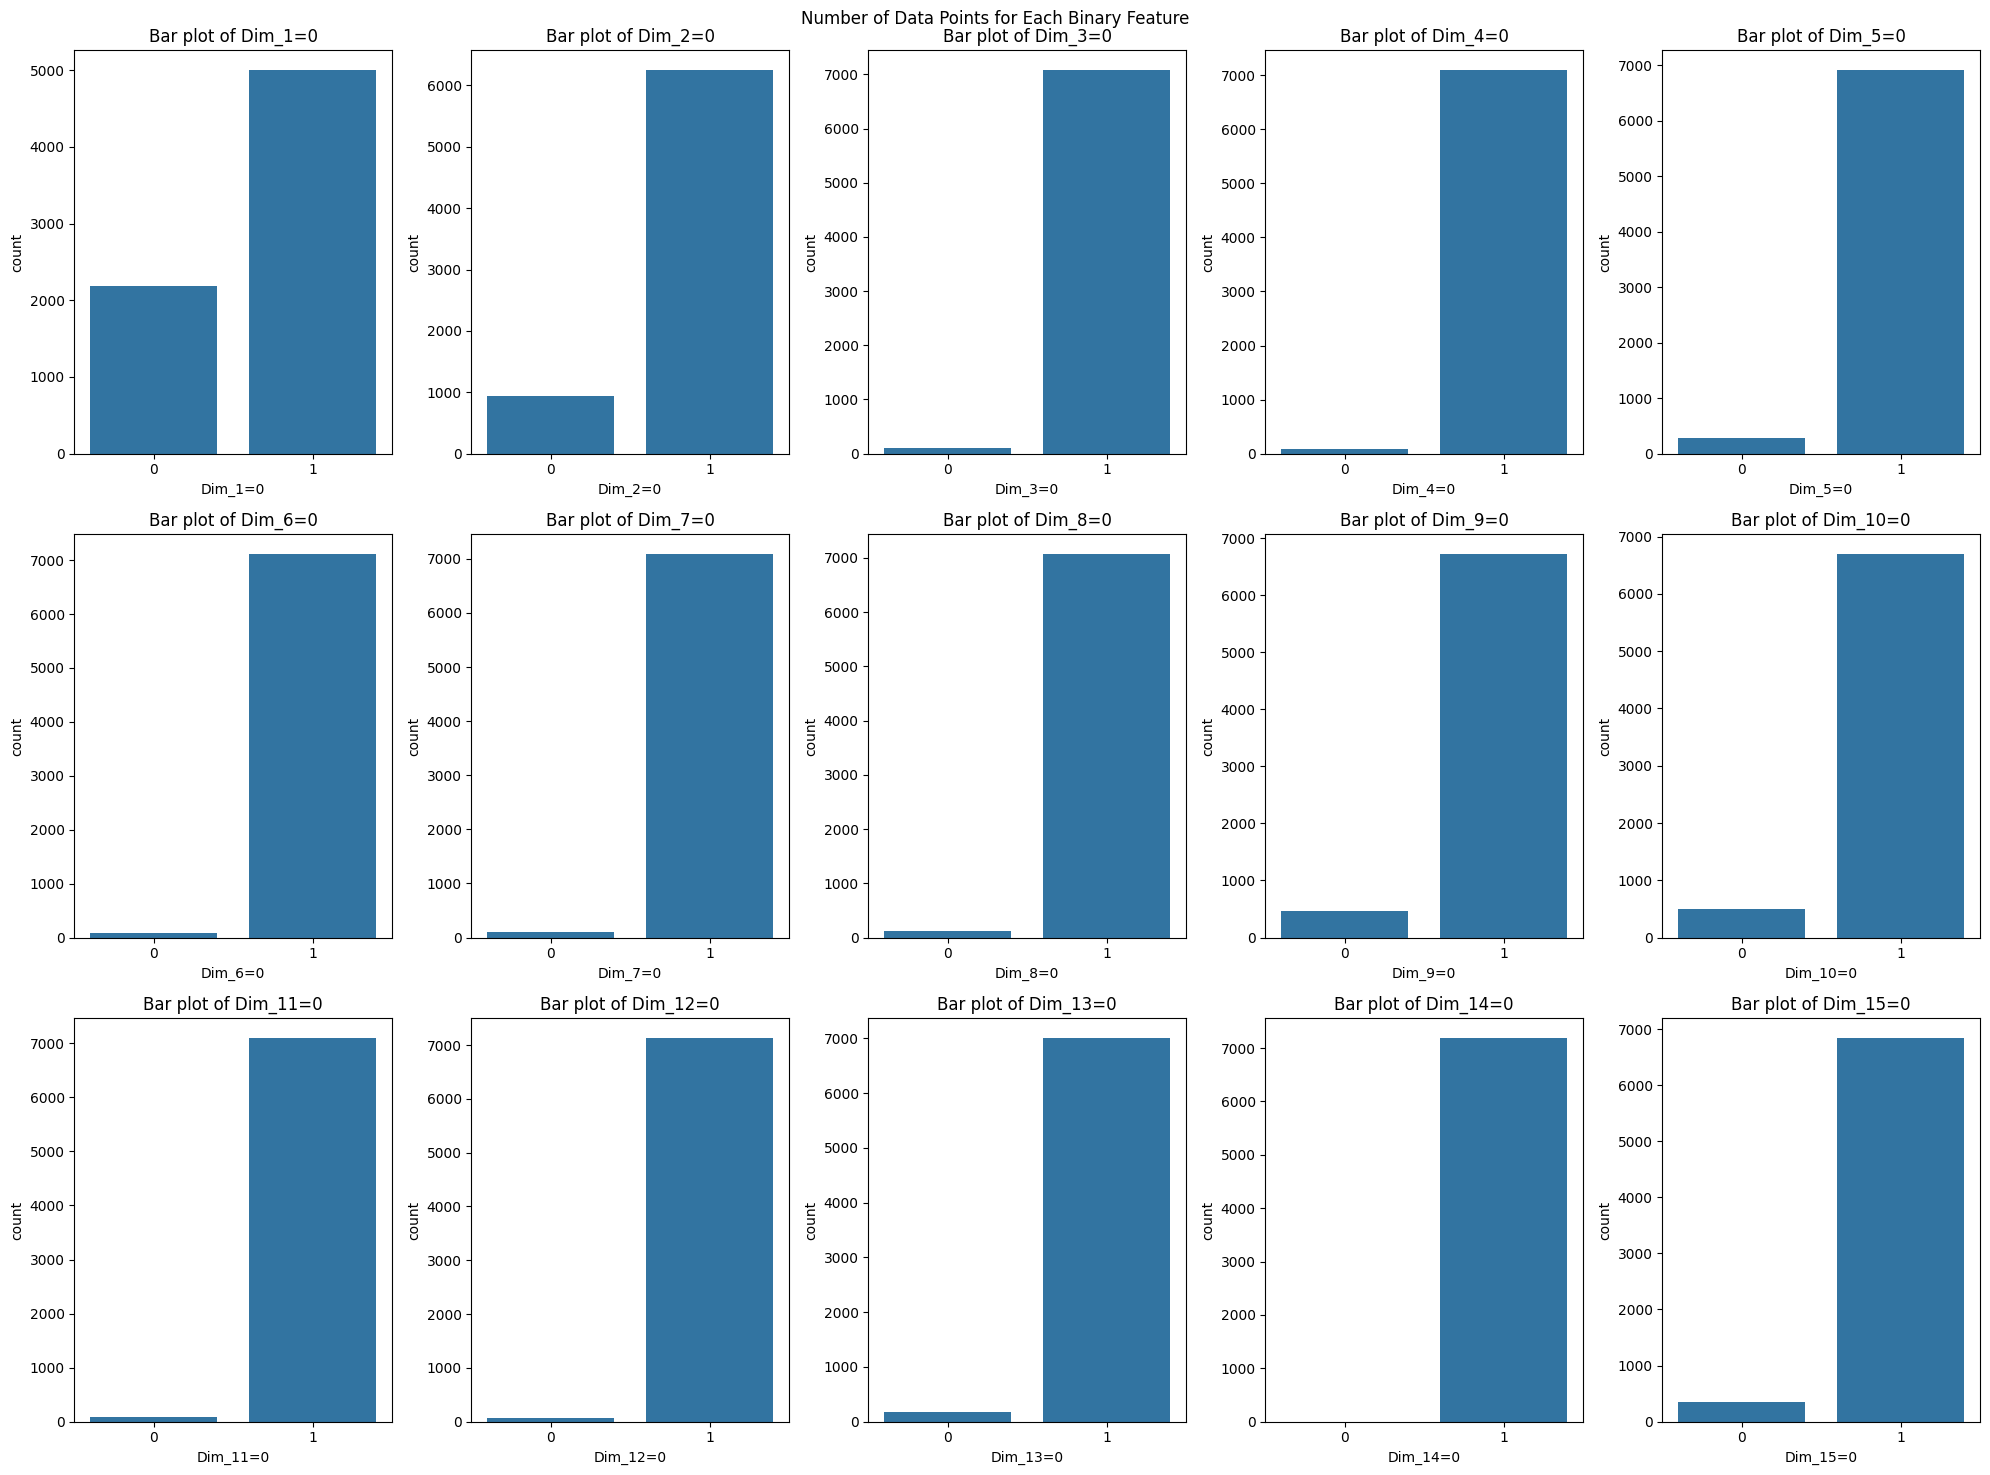

In [3]:
# Summary Statistics
print(df.describe())

# Visualizing the distributions of continuous features
df[continuous_cols].hist(bins=50, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Histograms of Continuous Features')
plt.show()

# Box plots to identify outliers in continuous features
df[continuous_cols].plot(kind='box', subplots=True, layout=(3, 3), figsize=(15, 10), sharex=False, sharey=False)
plt.suptitle('Box plots of Continuous Features')
plt.show()

# Create a figure with subplots for binary features
fig, axes = plt.subplots(3, 5, figsize=(20, 15))
axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate

# Plot each binary feature
for i, col in enumerate(binary_cols):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Bar plot of {col}')

plt.suptitle('Number of Data Points for Each Binary Feature')
plt.tight_layout()
plt.show()

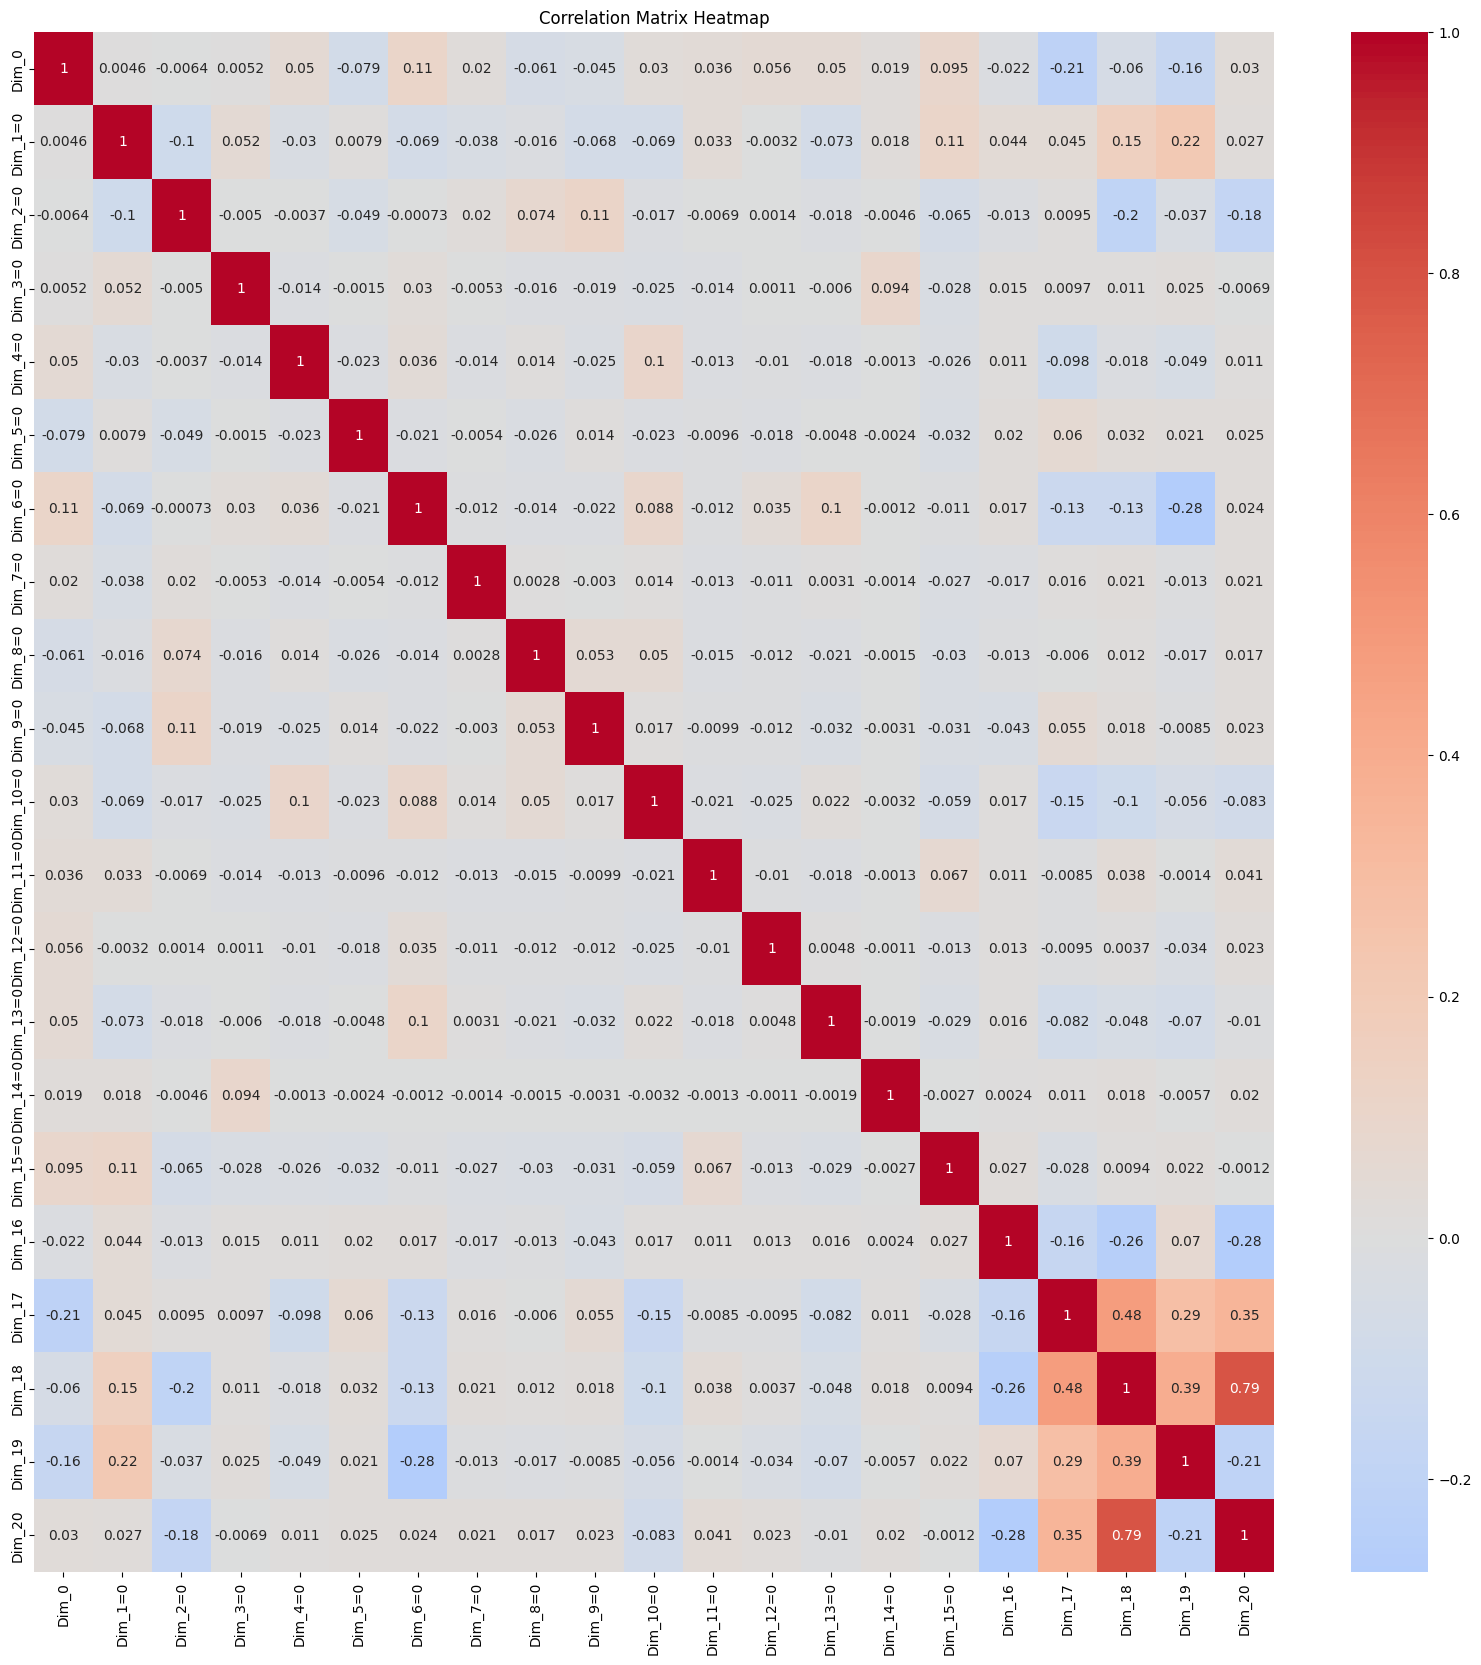

In [4]:
# Select the first 21 columns for correlation matrix heatmap
selected_cols = df.columns[:21]

# Create a correlation matrix for the selected columns
correlation_matrix = df[selected_cols].corr()

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [5]:
# Calculate the Gower distance matrix
gower_distances = gower.gower_matrix(df)

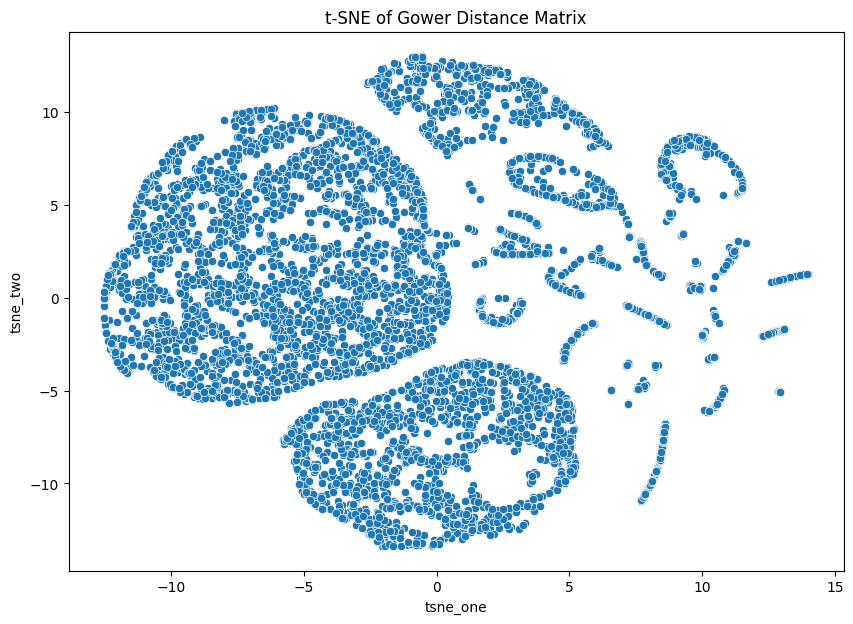

In [6]:
# Dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(gower_distances)
df['tsne_one'] = tsne_result[:, 0]
df['tsne_two'] = tsne_result[:, 1]

# Plotting t-SNE results
plt.figure(figsize=(10, 7))
sns.scatterplot(x='tsne_one', y='tsne_two', data=df)
plt.title('t-SNE of Gower Distance Matrix')
plt.show()

# DBSCAN

## -

Best parameters: eps=0.02782358933204558, min_samples=5
Best Silhouette Score: 0.6324834823608398
Best Davies-Bouldin Index: 1.0482764402731195
Best Calinski-Harabasz Index: 1453.396034616458

Top 5 parameters based on Silhouette Score:
Rank 1: eps=0.02782358933204558, min_samples=5, Silhouette Score=0.6324834823608398, Davies-Bouldin Index=1.0482764402731195, Calinski-Harabasz Index=1453.396034616458
Rank 2: eps=0.03511824237121117, min_samples=7, Silhouette Score=0.6306362152099609, Davies-Bouldin Index=1.068600266261278, Calinski-Harabasz Index=1545.5440763204954
Rank 3: eps=0.026479666972103286, min_samples=6, Silhouette Score=0.6268821954727173, Davies-Bouldin Index=1.078301951369074, Calinski-Harabasz Index=1533.5746670781798
Rank 4: eps=0.027361490665236868, min_samples=7, Silhouette Score=0.62550950050354, Davies-Bouldin Index=1.0666906406924013, Calinski-Harabasz Index=1578.1907753630455
Rank 5: eps=0.04596363826434563, min_samples=11, Silhouette Score=0.6201657056808472, Davi

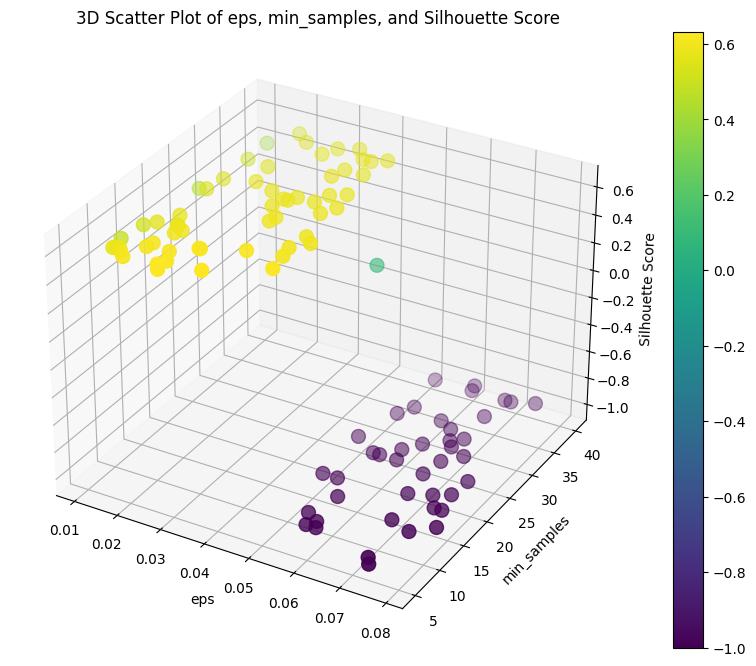

In [7]:
# Function to evaluate DBSCAN clustering
def evaluate_clustering(data, labels):
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    if n_clusters > 1:
        silhouette_avg = silhouette_score(data, labels, metric='precomputed')
        davies_bouldin = davies_bouldin_score(data, labels)
        calinski_harabasz = calinski_harabasz_score(data, labels)
        return silhouette_avg, davies_bouldin, calinski_harabasz
    else:
        return -1, np.inf, -1  # Invalid scores for insufficient clusters

# Number of random samples to try
n_iterations = 100

best_params = None
best_silhouette = -1
best_davies_bouldin = np.inf
best_calinski_harabasz = -1

# Lists to store results
results = []

# Perform random search
for _ in range(n_iterations):
    eps = random.uniform(0.01, 0.08)
    min_samples = random.randint(4, 40)
    
    # Apply DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='precomputed')
    dbscan_labels = dbscan.fit_predict(gower_distances)
    
    # Evaluate clustering
    silhouette_avg, davies_bouldin, calinski_harabasz = evaluate_clustering(gower_distances, dbscan_labels)
    
    # Store the results
    results.append((eps, min_samples, silhouette_avg, davies_bouldin, calinski_harabasz))
    
    # Compare scores (you can adjust the criteria for "best" according to your priorities)
    if silhouette_avg > best_silhouette:
        best_silhouette = silhouette_avg
        best_params = (eps, min_samples)
        best_davies_bouldin = davies_bouldin
        best_calinski_harabasz = calinski_harabasz

# Print the best parameters and their scores
print(f'Best parameters: eps={best_params[0]}, min_samples={best_params[1]}')
print(f'Best Silhouette Score: {best_silhouette}')
print(f'Best Davies-Bouldin Index: {best_davies_bouldin}')
print(f'Best Calinski-Harabasz Index: {best_calinski_harabasz}')

# Sort the results by silhouette score in descending order and get the top 5
sorted_results = sorted(results, key=lambda x: x[2], reverse=True)[:5]

# Print top 5 parameters
print("\nTop 5 parameters based on Silhouette Score:")
for i, (eps, min_samples, silhouette_avg, davies_bouldin, calinski_harabasz) in enumerate(sorted_results):
    print(f"Rank {i+1}: eps={eps}, min_samples={min_samples}, Silhouette Score={silhouette_avg}, "
          f"Davies-Bouldin Index={davies_bouldin}, Calinski-Harabasz Index={calinski_harabasz}")

# Extract data for 3D scatter plot
eps_values = [result[0] for result in results]
min_samples_values = [result[1] for result in results]
silhouette_scores = [result[2] for result in results]

# 3D Scatter Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(eps_values, min_samples_values, silhouette_scores, c=silhouette_scores, cmap='viridis', s=100)
ax.set_xlabel('eps')
ax.set_ylabel('min_samples')
ax.set_zlabel('Silhouette Score')
plt.title('3D Scatter Plot of eps, min_samples, and Silhouette Score')
plt.colorbar(sc)
plt.show()

In [8]:
# Applying DBSCAN
dbscan = DBSCAN(eps=best_params[0], min_samples=best_params[1], metric='precomputed')
dbscan_labels = dbscan.fit_predict(gower_distances)

# Adding labels to the dataframe
df['dbscan_labels'] = dbscan_labels

# Identifying anomalies
anomalies = df[df['dbscan_labels'] == -1]
normal_points = df[df['dbscan_labels'] != -1]
print(f'Number of anomalies detected: {len(anomalies)}')
print(anomalies)


# Silhouette score for the clustering
silhouette_avg = silhouette_score(gower_distances, dbscan_labels, metric='precomputed')
print(f'Silhouette Score: {silhouette_avg}')

Number of anomalies detected: 173
         Dim_0  Dim_1=0  Dim_2=0  Dim_3=0  Dim_4=0  Dim_5=0  Dim_6=0  Dim_7=0  \
38    0.385417        1        1        1        1        1        1        1   
39    0.385417        1        1        1        1        1        1        1   
93    0.562500        0        0        1        1        0        1        1   
124   0.645833        1        1        0        1        0        1        1   
162   0.500000        1        0        1        1        1        1        1   
...        ...      ...      ...      ...      ...      ...      ...      ...   
6969  0.614583        0        0        1        1        1        1        1   
7016  0.604167        0        1        1        1        0        1        1   
7042  0.260417        1        0        1        1        1        1        1   
7116  0.354167        1        0        1        1        1        1        1   
7129  0.468750        0        1        1        1        1        1       

/var/folders/3_/n1pk8pf146ld5kk56j0qrv480000gn/T/ipykernel_22255/98084041.py:6: UserWarning: 
The palette list has fewer values (6) than needed (52) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='tsne_one', y='tsne_two', hue='dbscan_labels', palette=palette, data=df[df['dbscan_labels'] != -1], alpha=0.8)


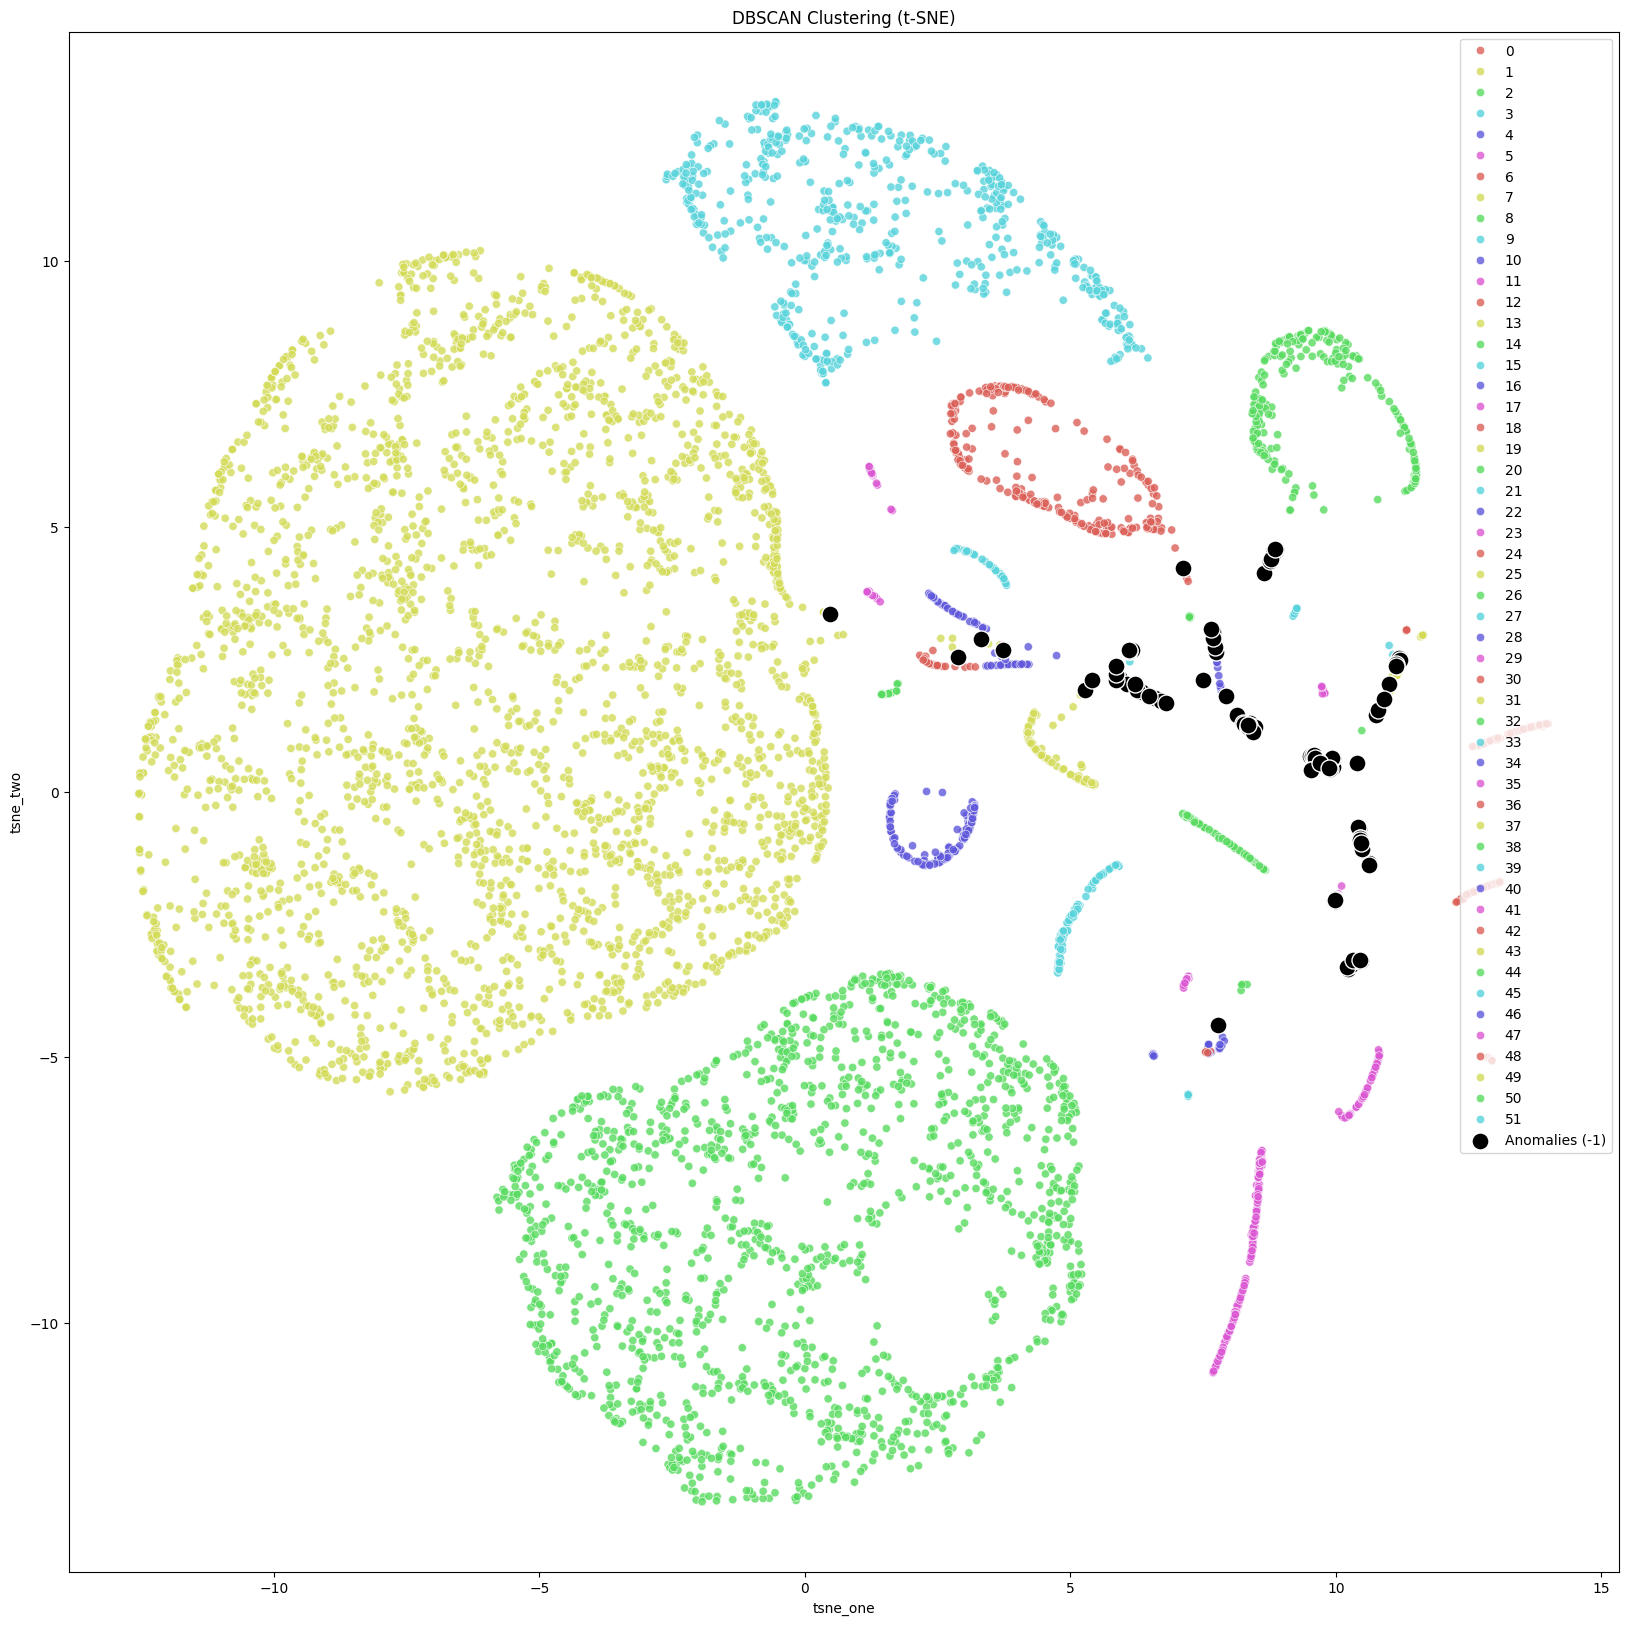

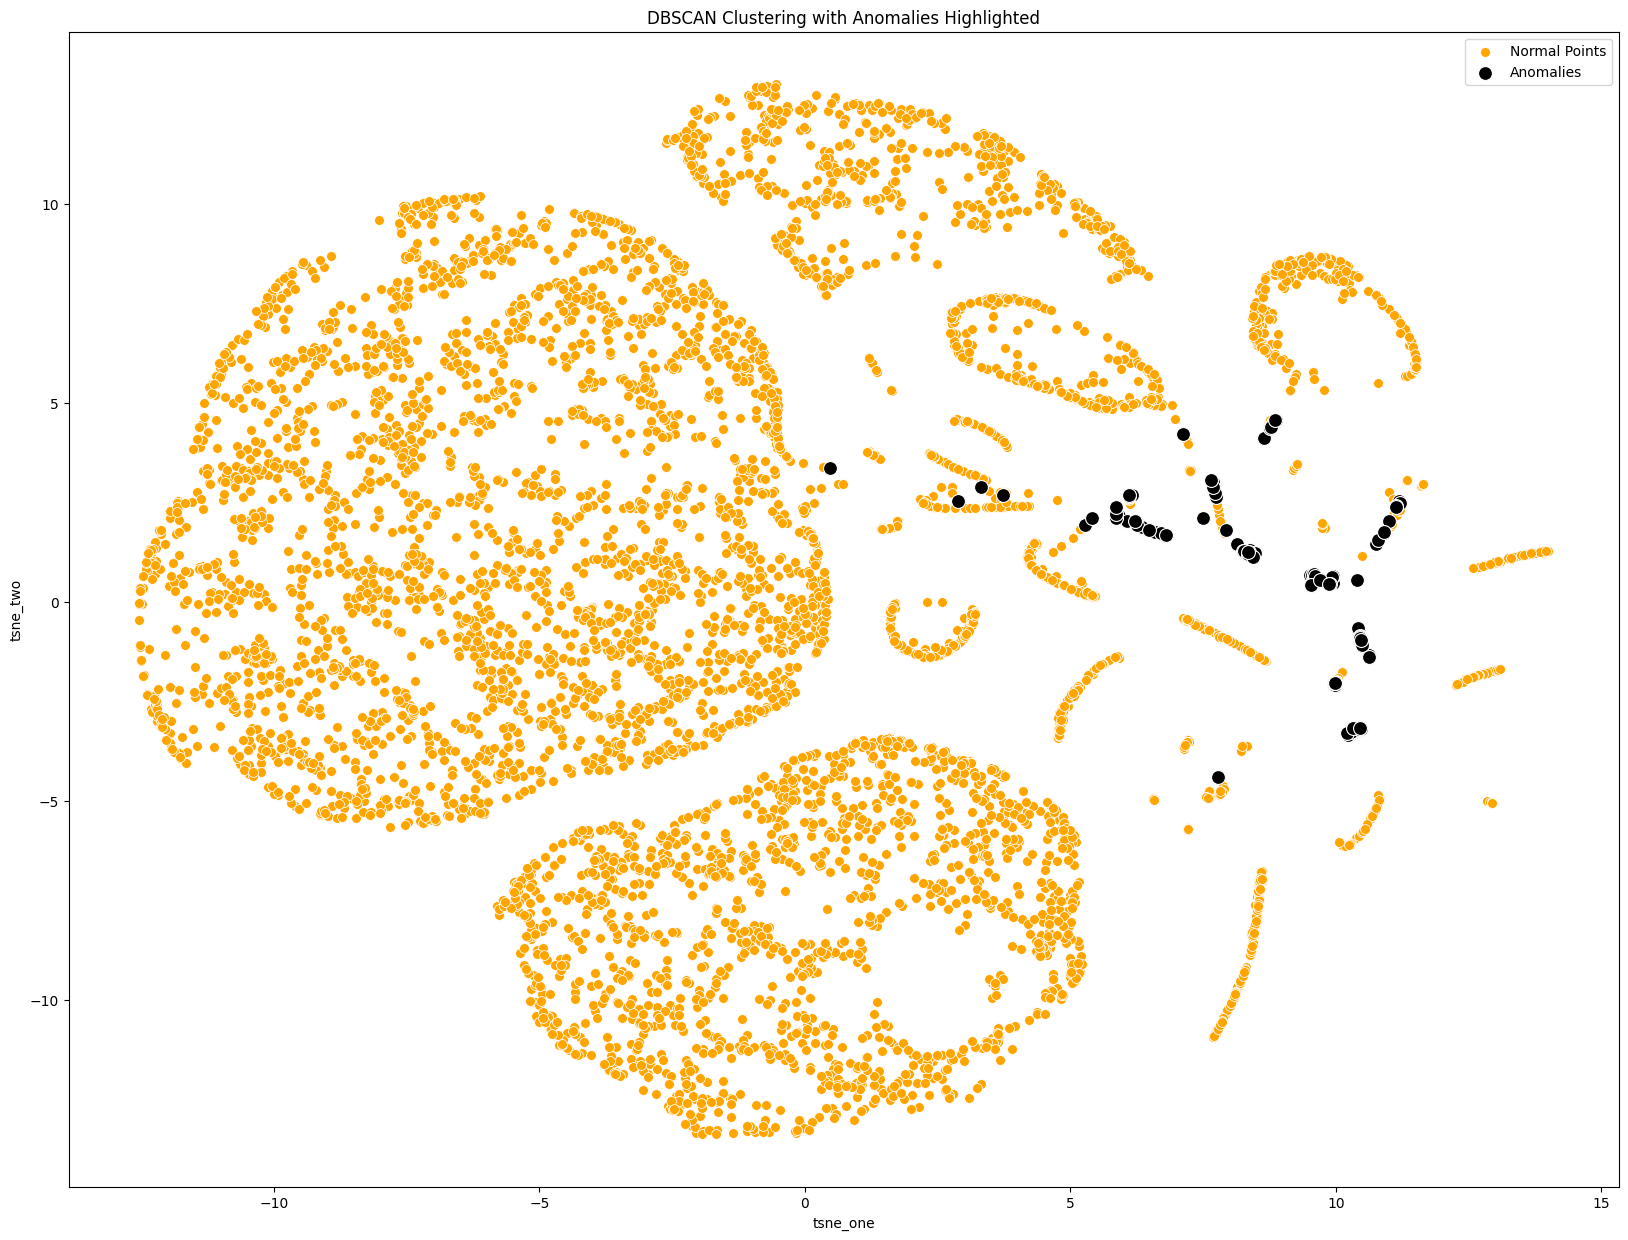

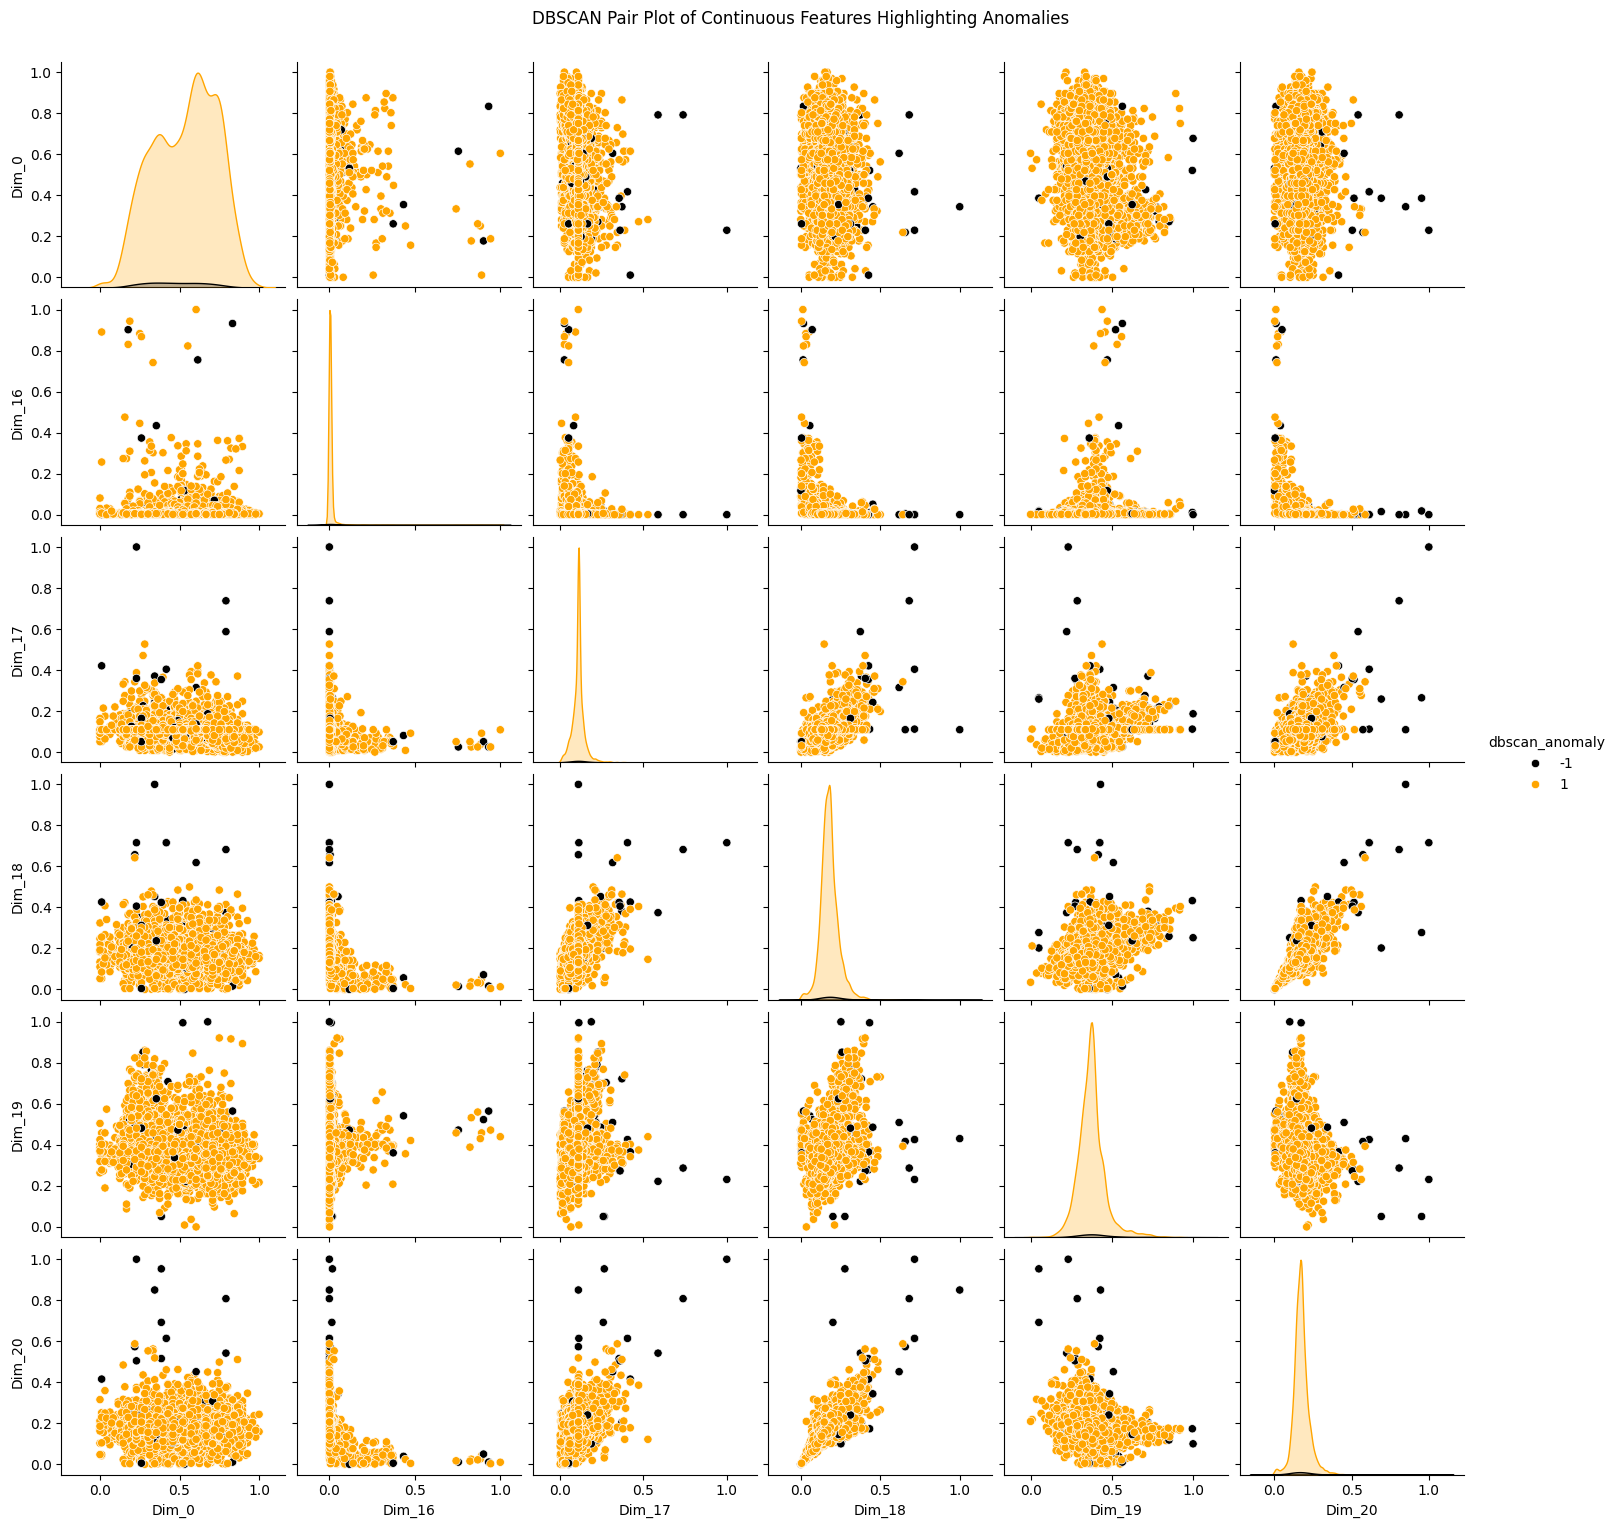

In [9]:
# Visualize DBSCAN results with improved color palette
palette = sns.color_palette("hls")

# Plotting t-SNE results
plt.figure(figsize=(20, 20))
sns.scatterplot(x='tsne_one', y='tsne_two', hue='dbscan_labels', palette=palette, data=df[df['dbscan_labels'] != -1], alpha=0.8)
sns.scatterplot(x='tsne_one', y='tsne_two', data=df[df['dbscan_labels'] == -1], color='black', s=150, label='Anomalies (-1)')
plt.title('DBSCAN Clustering (t-SNE)')
plt.legend(loc='best')

# Visualize clusters with anomalies highlighted
plt.figure(figsize=(20, 15))
sns.scatterplot(x='tsne_one', y='tsne_two', data=df[df['dbscan_labels'] != -1], color='orange', label='Normal Points', s=50)
sns.scatterplot(x='tsne_one', y='tsne_two', data=df[df['dbscan_labels'] == -1], color='black', label='Anomalies', s=100)
plt.title('DBSCAN Clustering with Anomalies Highlighted')
plt.legend(loc='best')
plt.show()

# Add the anomaly indicator
df['dbscan_anomaly'] = df['dbscan_labels'].apply(lambda x: -1 if x == -1 else 1)

# Pair plot
sns.pairplot(df[list(continuous_cols) + ['dbscan_anomaly']], hue='dbscan_anomaly', palette={1: 'orange', -1: 'black'})
plt.suptitle('DBSCAN Pair Plot of Continuous Features Highlighting Anomalies', y=1.02)
plt.show()

# LOF

Number of anomalies detected: 96


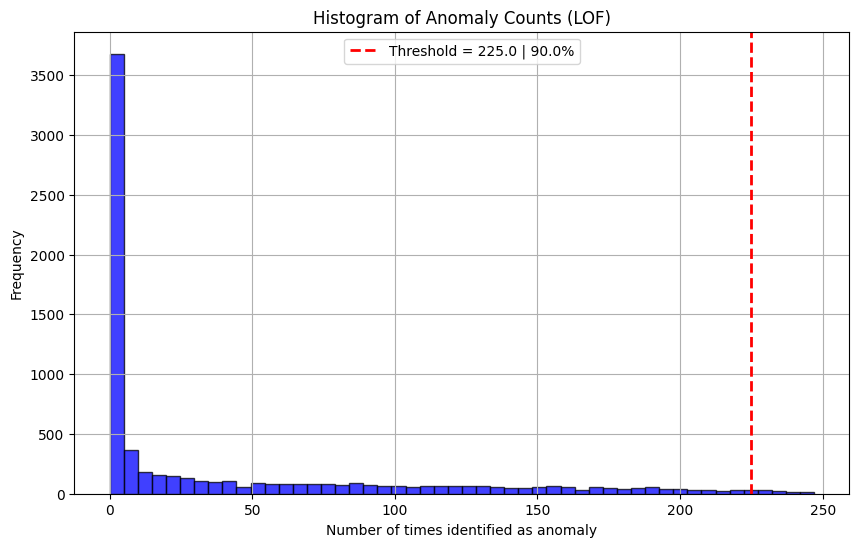

In [10]:
# Number of random samples to try
n_iterations = 250
threshold_ratio = 0.90

# Matrix to count how often each point is considered an anomaly
anomaly_counts = np.zeros(len(df))

# Perform random search
for _ in range(n_iterations):
    n_neighbors = random.randint(3, 50)
    contamination = random.uniform(0.005, 0.4)
    
    # Apply LOF
    lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination, metric='precomputed', novelty=True)
    lof.fit(gower_distances)
    labels = lof.predict(gower_distances)
    
    # Increment anomaly counts
    anomaly_counts[labels == -1] += 1

# Determine anomalies based on the threshold ratio
anomaly_threshold = threshold_ratio * n_iterations
df['lof_labels'] = np.where(anomaly_counts >= anomaly_threshold, -1, 1)

# Identifying anomalies
anomalies = df[df['lof_labels'] == -1]
normal_points = df[df['lof_labels'] != -1]
print(f'Number of anomalies detected: {len(anomalies)}')

# Plotting histogram of LOF scores with the threshold line
plt.figure(figsize=(10, 6))
plt.hist(anomaly_counts, bins=50, alpha=0.75, color='blue', edgecolor='black')
plt.axvline(x=anomaly_threshold, color='red', linestyle='--', linewidth=2, label=f'Threshold = {anomaly_threshold} | {threshold_ratio * 100}%')
plt.title('Histogram of Anomaly Counts (LOF)')
plt.xlabel('Number of times identified as anomaly')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()
plt.show()

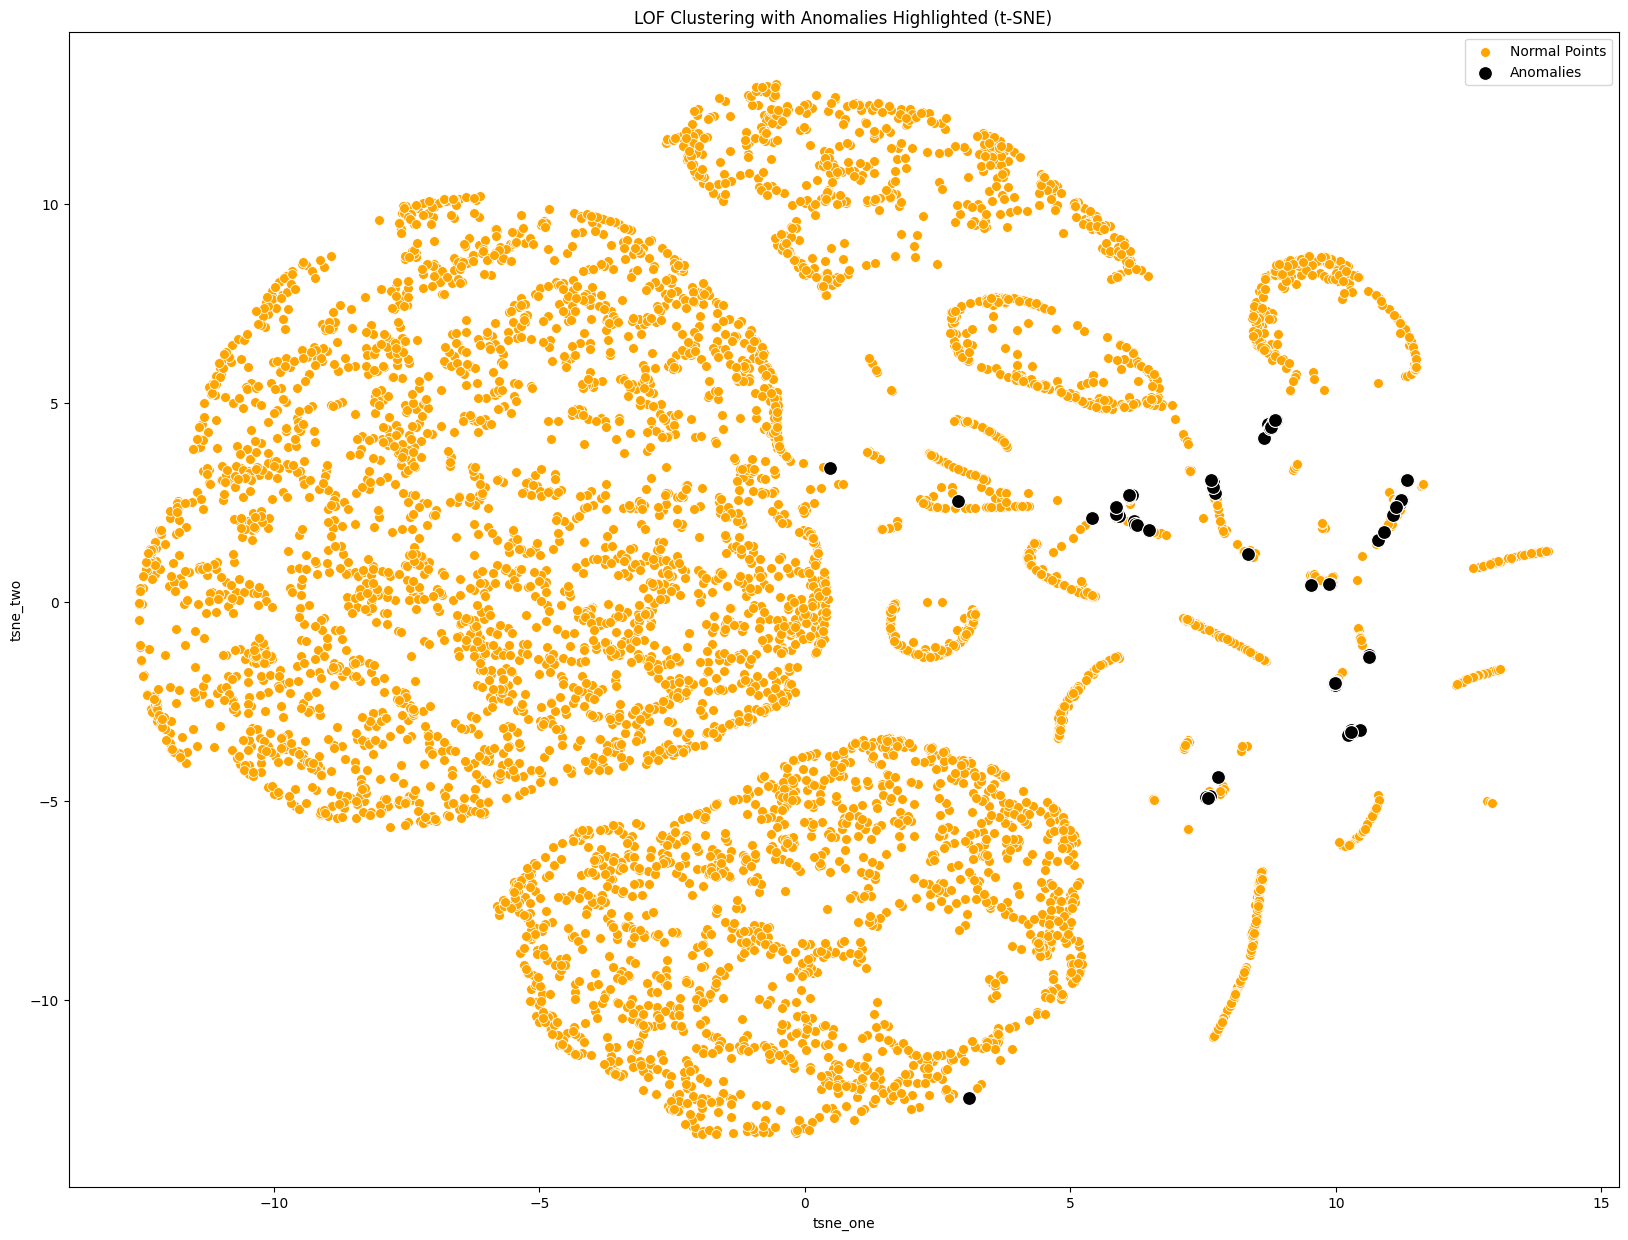

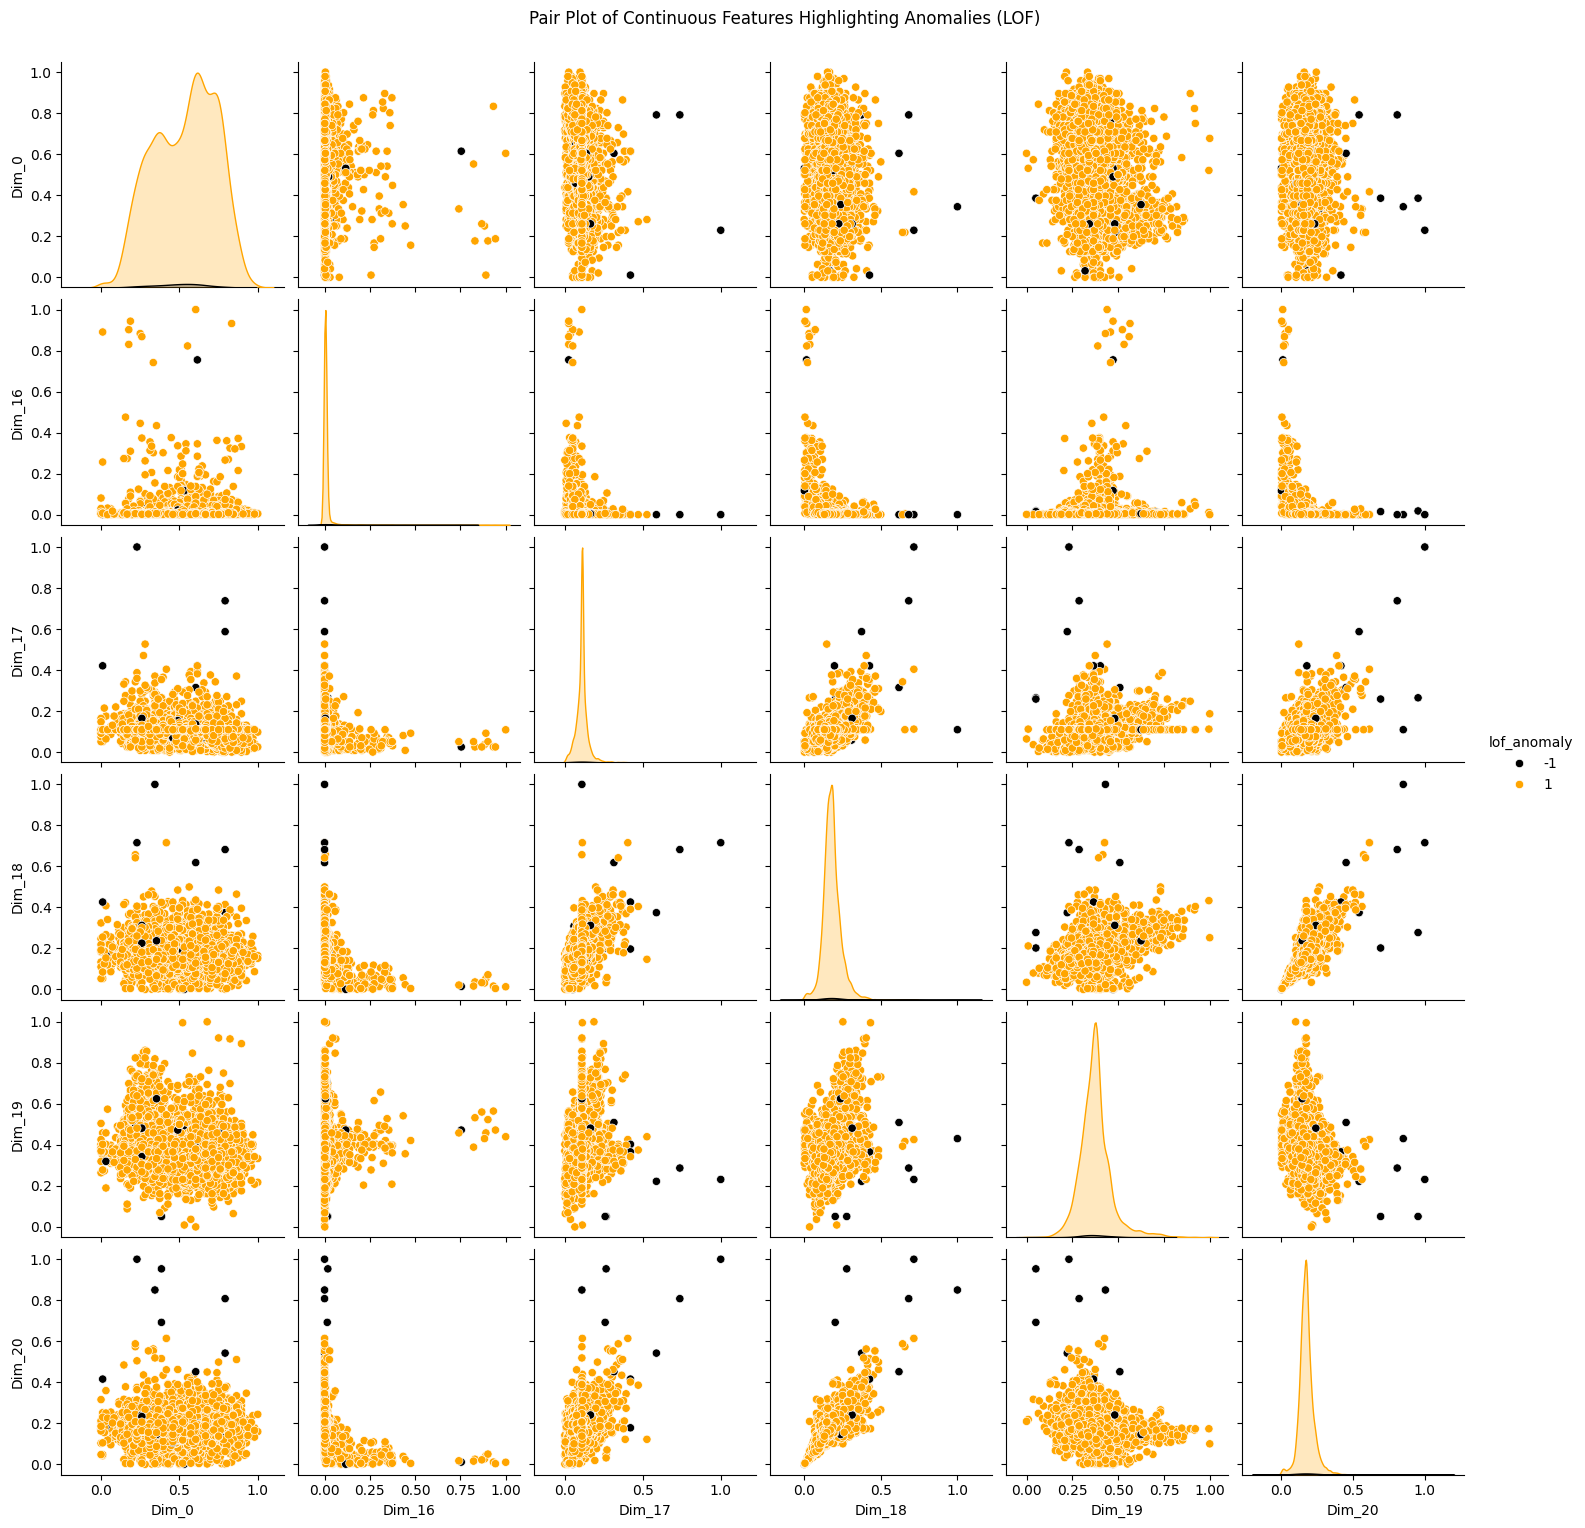

In [11]:
# Visualize LOF results with improved color palette
palette = sns.color_palette("hls")

# Visualize clusters with anomalies highlighted
plt.figure(figsize=(20, 15))
sns.scatterplot(x='tsne_one', y='tsne_two', data=df[df['lof_labels'] != -1], color='orange', label='Normal Points', s=50)
sns.scatterplot(x='tsne_one', y='tsne_two', data=df[df['lof_labels'] == -1], color='black', label='Anomalies', s=100)
plt.title('LOF Clustering with Anomalies Highlighted (t-SNE)')
plt.legend(loc='best')
plt.show()

# Add the anomaly indicator
df['lof_anomaly'] = df['lof_labels'].apply(lambda x: -1 if x == -1 else 1)

# Pair plot
sns.pairplot(df[list(continuous_cols) + ['lof_anomaly']], hue='lof_anomaly', palette={1: 'orange', -1: 'black'})
plt.suptitle('Pair Plot of Continuous Features Highlighting Anomalies (LOF)', y=1.02)
plt.show()

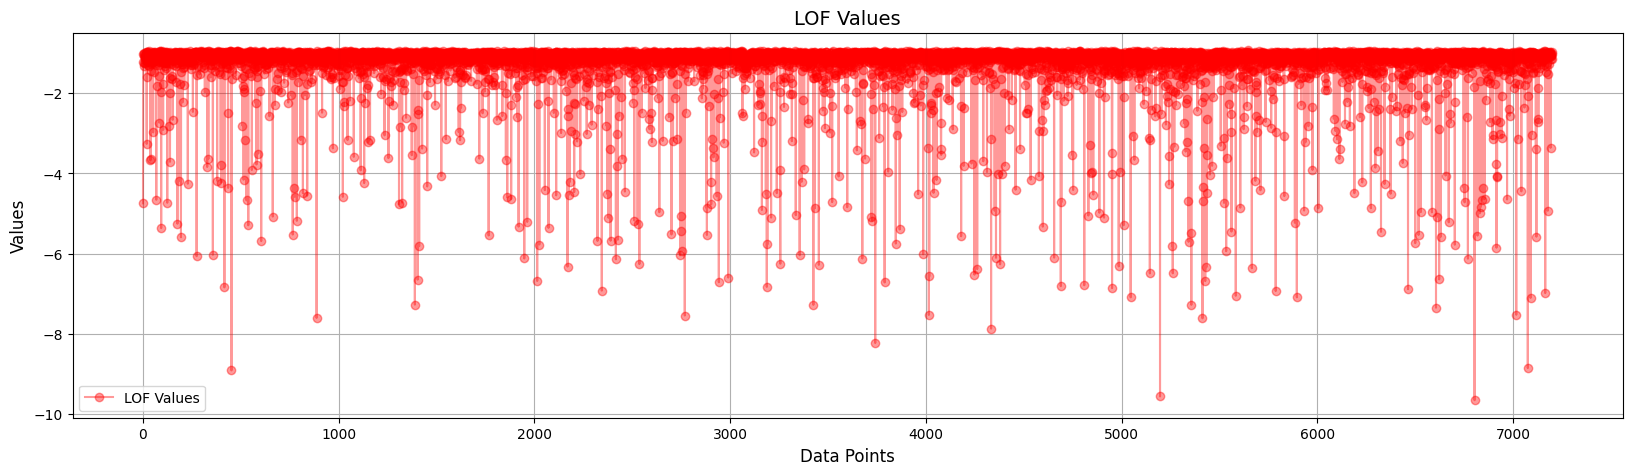

In [12]:
lof_values = lof.negative_outlier_factor_

# Plot DBSCAN and LOF values
fig, ax = plt.subplots(figsize=(20, 5))

# Plotting the LOF values as a line with markers
ax.plot(df.index, lof_values, 'ro-', label='LOF Values', alpha=0.4)

ax.set_xlabel('Data Points', fontsize=12)
ax.set_ylabel('Values', fontsize=12)
ax.set_title('LOF Values', fontsize=14)
ax.legend(fontsize=10)
ax.grid(True)

plt.show()

Adjusted Rand Index between DBSCAN and LOF: 0.4798559713330525


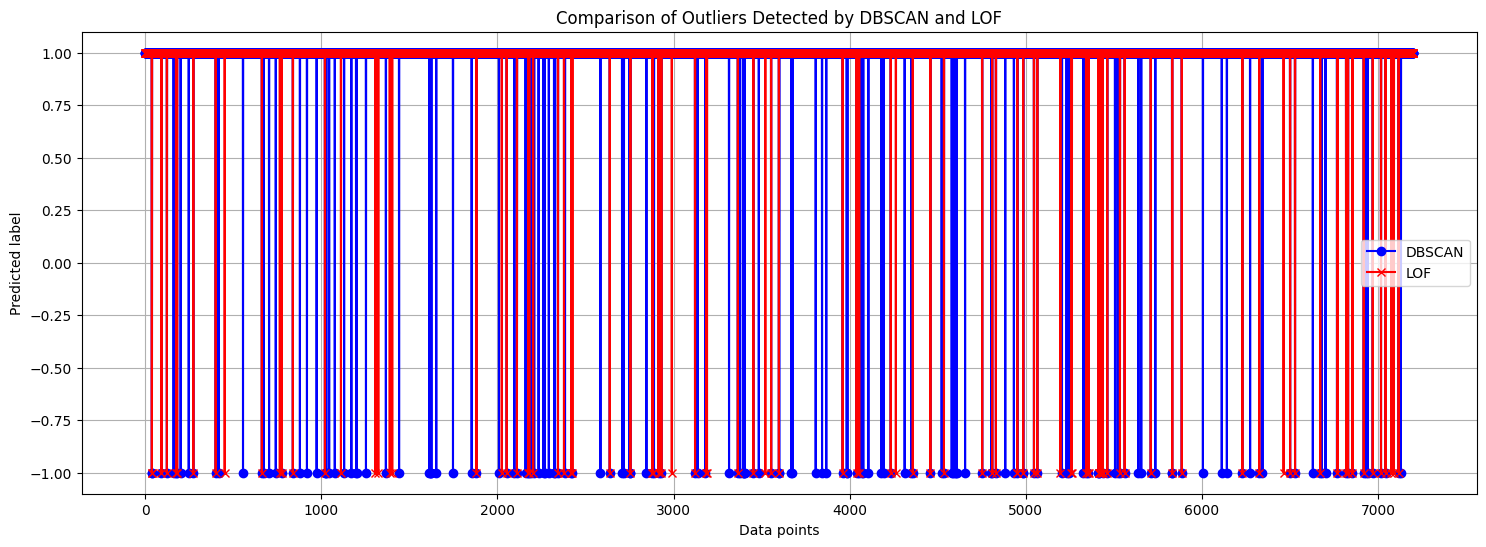

In [13]:
# Calculate adjusted Rand index
R_DBSCAN_LOF = adjusted_rand_score(df['dbscan_anomaly'], df['lof_anomaly'])
print('Adjusted Rand Index between DBSCAN and LOF:', R_DBSCAN_LOF)

# Visual comparison of the outliers detected by DBSCAN and LOF
fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(df['dbscan_anomaly'], color='blue', marker="o", label='DBSCAN')
ax.plot(df['lof_anomaly'], color='red', marker="x", label='LOF')
ax.set_xlabel('Data points')
ax.set_ylabel('Predicted label')
ax.set_title('Comparison of Outliers Detected by DBSCAN and LOF')
ax.legend(["DBSCAN", "LOF"])
ax.grid(True)
plt.show()

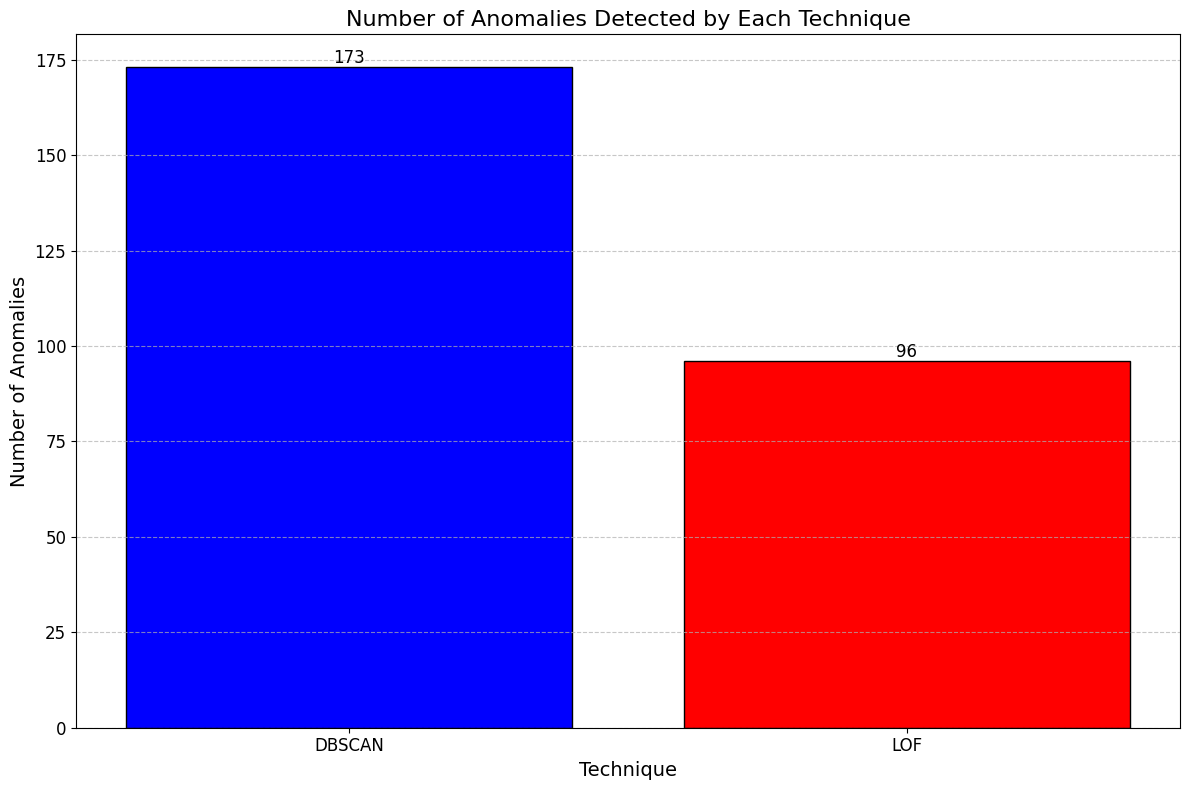

In [14]:
# Count the number of anomalies detected by each method
num_anomalies_dbscan = df['dbscan_anomaly'].value_counts().get(-1, 0)
num_anomalies_lof = df['lof_anomaly'].value_counts().get(-1, 0)

# Create a bar plot
techniques = ['DBSCAN', 'LOF']
num_anomalies = [num_anomalies_dbscan, num_anomalies_lof]

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

bars = ax.bar(techniques, num_anomalies, color=['blue', 'red'], edgecolor='black')

# Add numbers on top of the bars
for bar, count in zip(bars, num_anomalies):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval, int(count), va='bottom', ha='center', fontsize=12)

# Style the plot
ax.set_xlabel('Technique', fontsize=14)
ax.set_ylabel('Number of Anomalies', fontsize=14)
ax.set_title('Number of Anomalies Detected by Each Technique', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.7, axis='y')

# Display the plot
plt.tight_layout()
plt.show()

# DBSCAN & LOF Combined

In [22]:
# Number of random samples to try
n_iterations = 500
threshold_ratio = 0.90
min_outliers = 75  

best_params = None
best_rand_index = -1
best_combined_labels = None

# Perform random search
for i in range(n_iterations):
    eps = random.uniform(0.02, 0.06)
    min_samples = random.randint(3, 40)
    
    # Apply DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='precomputed')
    dbscan_labels = dbscan.fit_predict(gower_distances)
    num_dbscan_outliers = np.sum(dbscan_labels == -1)
    
    # Apply LOF
    n_neighbors = random.randint(3, 40)
    contamination = random.uniform(0.01, 0.3)
    lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination, metric='precomputed', novelty=True)
    lof.fit(gower_distances)
    lof_labels = lof.predict(gower_distances)
    num_lof_outliers = np.sum(lof_labels == -1)

    # Combine DBSCAN and LOF labels
    combined_labels = np.where((dbscan_labels == -1) & (lof_labels == -1), -1, 1)
    num_combined_outliers = np.sum(combined_labels == -1)

    # Print the number of outliers found
    print(f"Iteration {i+1}: DBSCAN outliers = {num_dbscan_outliers}, LOF outliers = {num_lof_outliers}, Combined outliers = {num_combined_outliers}")
    
    # Check if the number of outliers in the intersection is at least the minimum threshold
    if num_combined_outliers < min_outliers:
        print(f"Iteration {i+1}: Insufficient outliers in intersection ({num_combined_outliers}). Continuing search.")
        continue
    
    # Calculate adjusted Rand index
    rand_index = adjusted_rand_score(dbscan_labels, lof_labels)
    
    # Compare scores
    if rand_index > best_rand_index:
        best_rand_index = rand_index
        best_params = (eps, min_samples, n_neighbors, contamination)
        best_dbscan_labels = dbscan_labels.copy()
        best_lof_labels = lof_labels.copy()
        best_combined_labels = combined_labels.copy()
        print(f"Iteration {i+1}: New best rand_index {best_rand_index} with {num_combined_outliers} combined outliers.")
        print(f"DBSCAN outliers = {num_dbscan_outliers}, LOF outliers = {num_lof_outliers}, Combined outliers = {num_combined_outliers}")

if best_combined_labels is None:
    raise ValueError("No suitable parameters found that detect at least the minimum number of outliers in the intersection.")

print(f'Best parameters: eps={best_params[0]}, min_samples={best_params[1]}, n_neighbors={best_params[2]}, contamination={best_params[3]}')
print(f'Best Adjusted Rand Index: {best_rand_index}')
print(f'Number of outliers in the intersection: {np.sum(best_combined_labels == -1)}')

# Add combined labels to the dataframe temporarily for plotting
df['combined_labels'] = best_combined_labels



Iteration 1: DBSCAN outliers = 511, LOF outliers = 991, Combined outliers = 301
Iteration 1: New best rand_index 0.26989764569477254 with 301 combined outliers.
DBSCAN outliers = 511, LOF outliers = 991, Combined outliers = 301
Iteration 2: DBSCAN outliers = 605, LOF outliers = 996, Combined outliers = 174
Iteration 3: DBSCAN outliers = 433, LOF outliers = 566, Combined outliers = 126
Iteration 4: DBSCAN outliers = 454, LOF outliers = 1710, Combined outliers = 436
Iteration 5: DBSCAN outliers = 466, LOF outliers = 1099, Combined outliers = 301
Iteration 6: DBSCAN outliers = 572, LOF outliers = 1614, Combined outliers = 415
Iteration 7: DBSCAN outliers = 245, LOF outliers = 1505, Combined outliers = 225
Iteration 8: DBSCAN outliers = 597, LOF outliers = 1531, Combined outliers = 484
Iteration 9: DBSCAN outliers = 595, LOF outliers = 1746, Combined outliers = 415
Iteration 10: DBSCAN outliers = 44, LOF outliers = 271, Combined outliers = 14
Iteration 10: Insufficient outliers in intersec

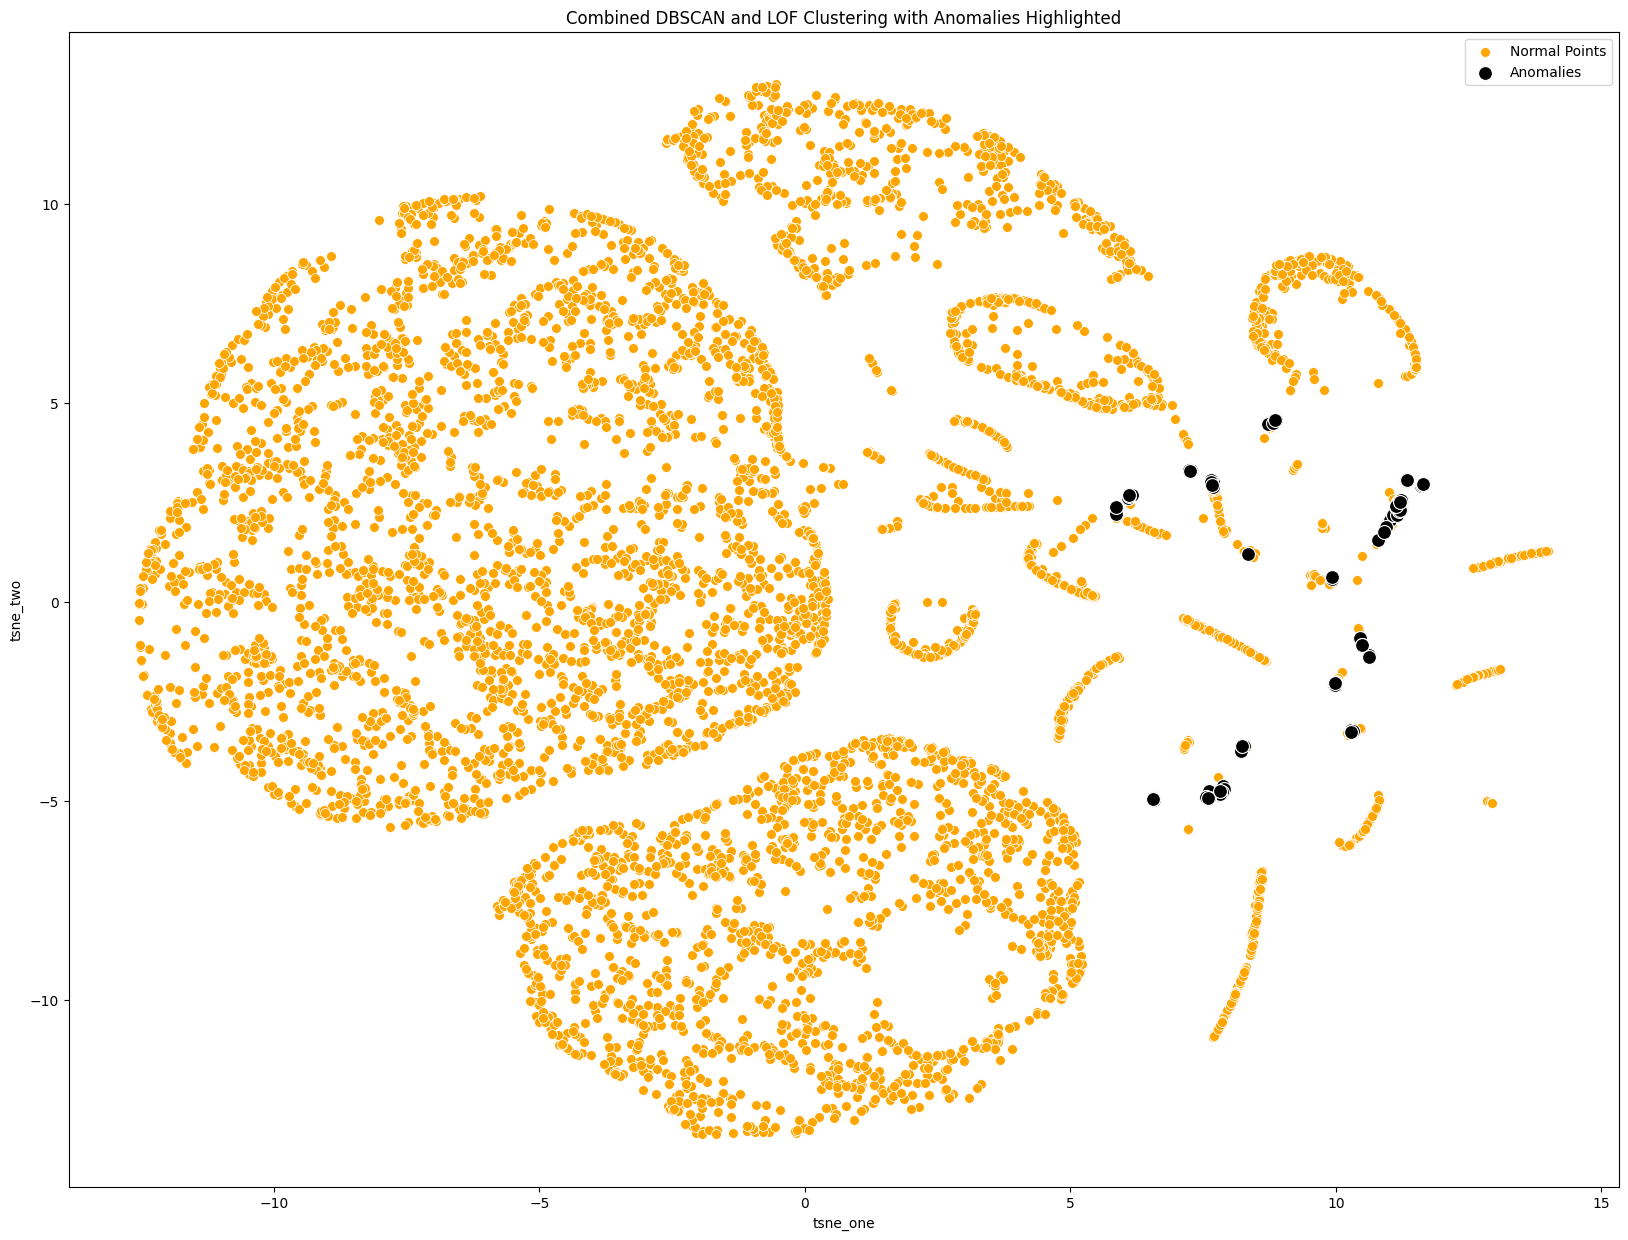

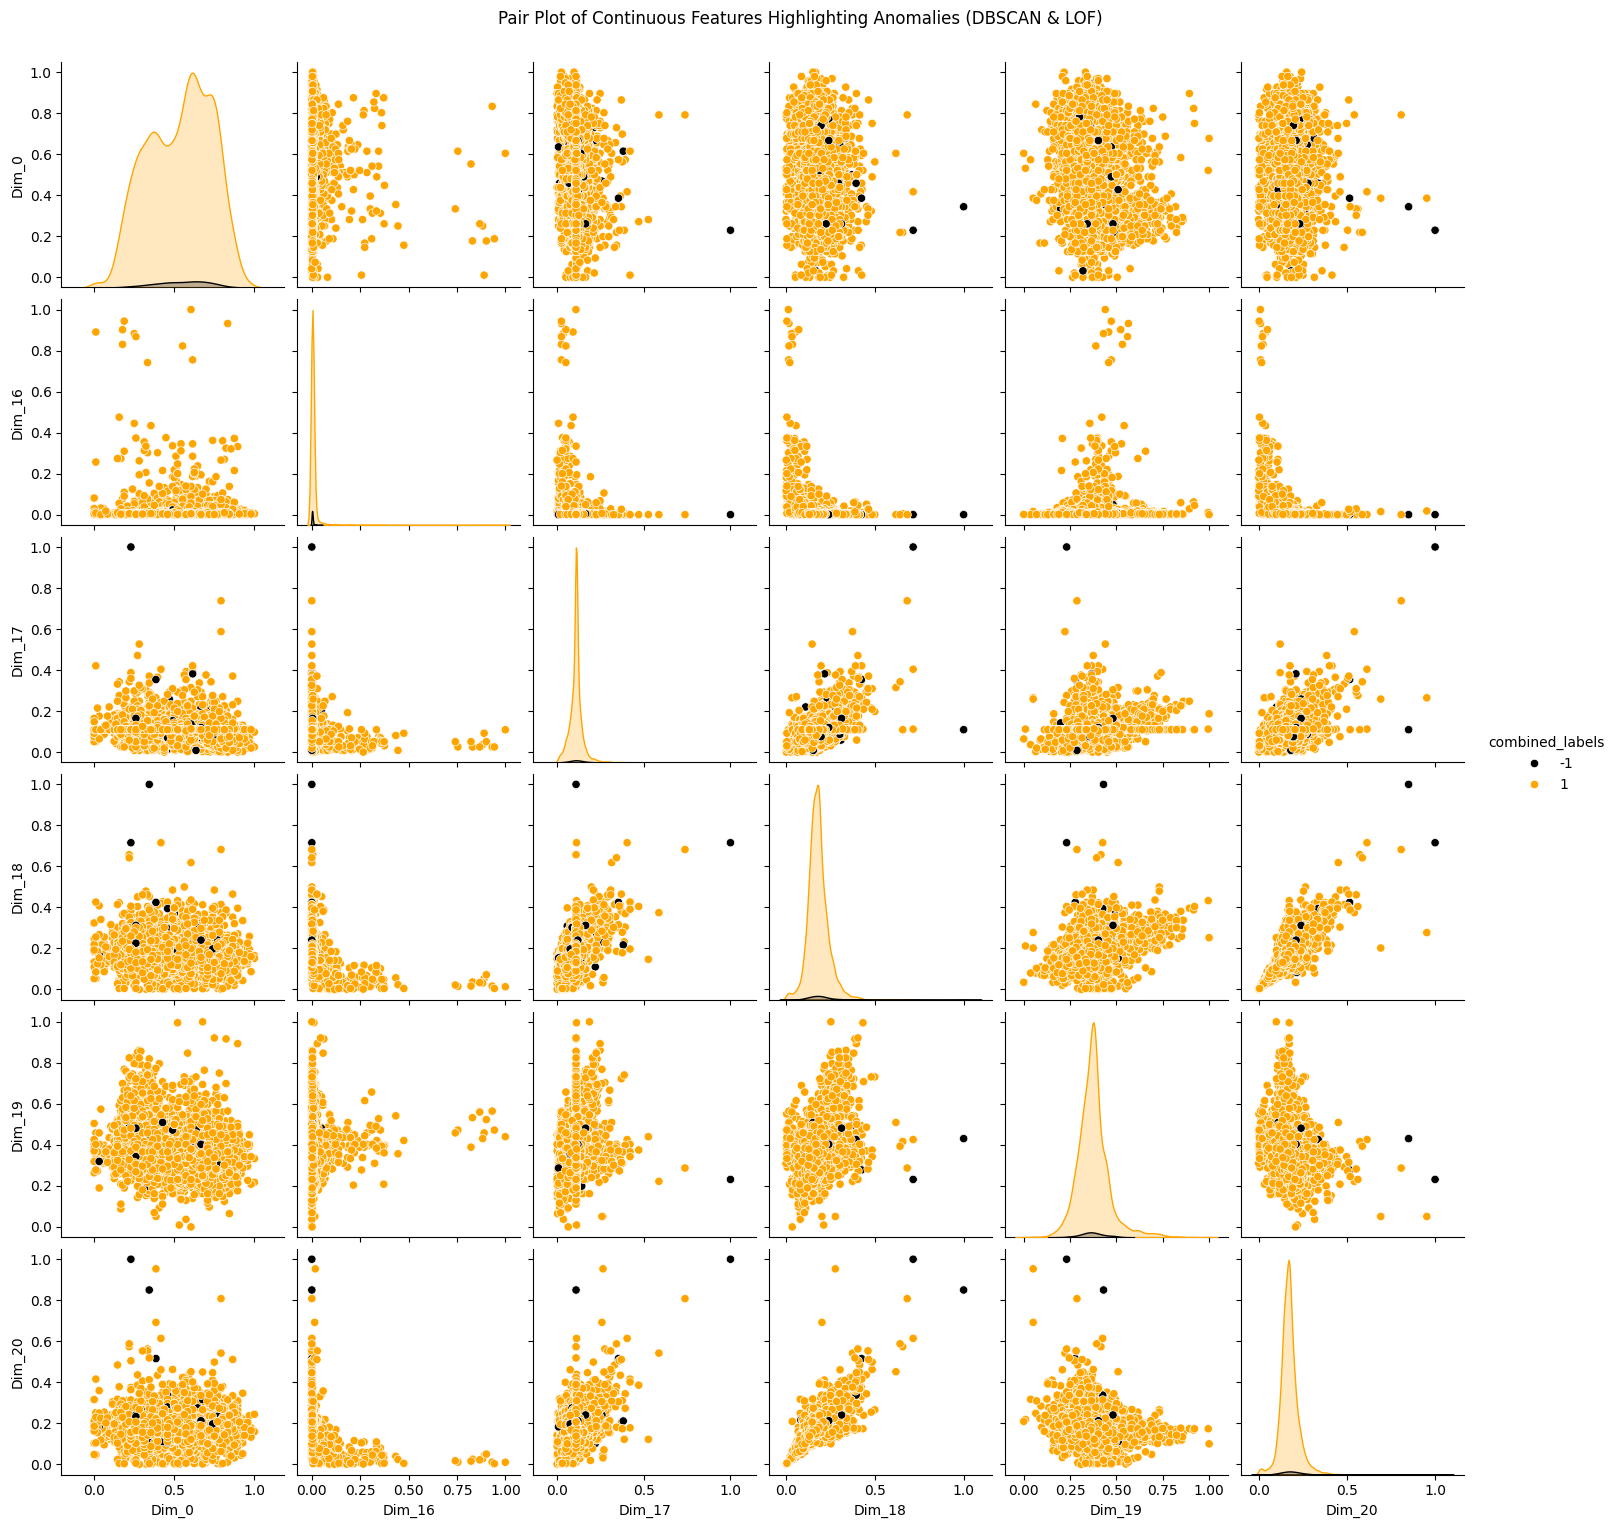

In [16]:
# Visualize results with improved color palette
palette = sns.color_palette("hls")

# Visualize clusters with anomalies highlighted
plt.figure(figsize=(20, 15))
sns.scatterplot(x='tsne_one', y='tsne_two', data=df[df['combined_labels'] != -1], color='orange', label='Normal Points', s=50)
sns.scatterplot(x='tsne_one', y='tsne_two', data=df[df['combined_labels'] == -1], color='black', label='Anomalies', s=100)
plt.title('Combined DBSCAN and LOF Clustering with Anomalies Highlighted')
plt.legend(loc='best')
plt.show()

# Pair plot
sns.pairplot(df[list(continuous_cols) + ['combined_labels']], hue='combined_labels', palette={1: 'orange', -1: 'black'})
plt.suptitle('Pair Plot of Continuous Features Highlighting Anomalies (DBSCAN & LOF)', y=1.02)
plt.show()

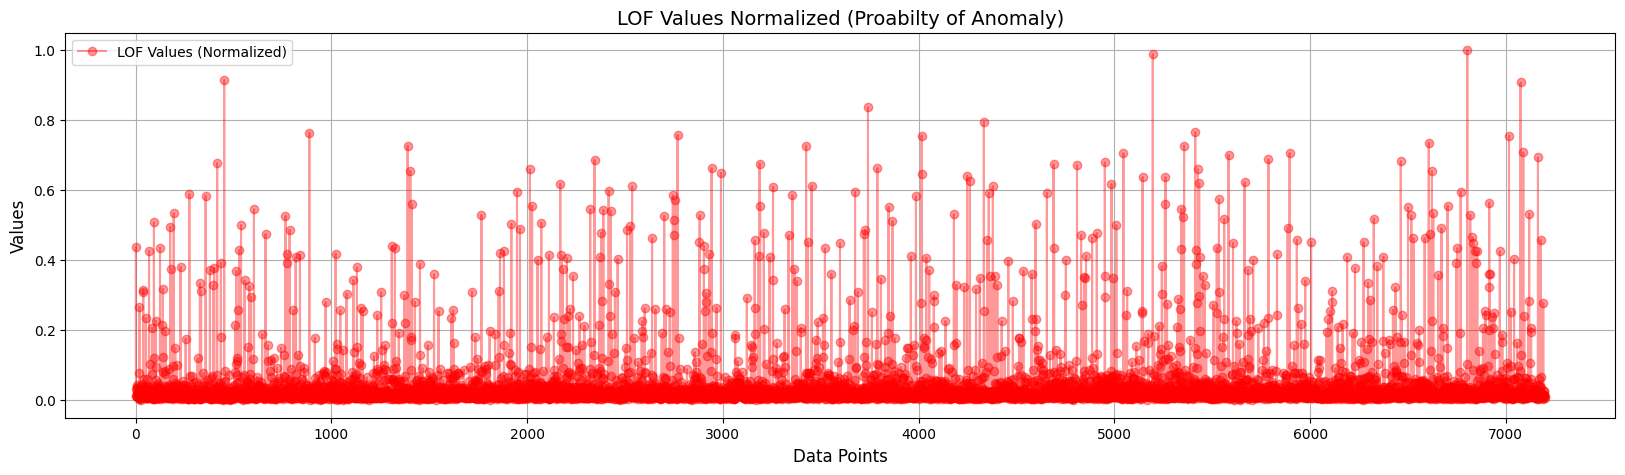

In [35]:
# Invert and normalize LOF scores to a range between 0 and 1
lof_values_normalized = (lof_values.max() - lof_values) / (lof_values.max() - lof_values.min())

# Plot DBSCAN and LOF values
fig, ax = plt.subplots(figsize=(20, 5))

# Plotting the LOF values as a line with markers
ax.plot(df.index, lof_values_normalized, 'ro-', label='LOF Values (Normalized)', alpha=0.4)

ax.set_xlabel('Data Points', fontsize=12)
ax.set_ylabel('Values', fontsize=12)
ax.set_title('LOF Values Normalized (Proabilty of Anomaly)', fontsize=14)
ax.legend(fontsize=10)
ax.grid(True)

plt.show()

# Save the normalized LOF scores as the probability of anomality
df['lof_anomaly_probability'] = lof_values_normalized

# Export the .csv file
df.to_csv("dataset_with_lof_anomaly_probability.csv")